<a id='top'></a>
# Analys av COVID-19 i Sverige

All data kommer från [Folkhälsomyndigheten](https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/bekraftade-fall-i-sverige/).

Folkhälsomyndigheten visar sin statistik [här](https://experience.arcgis.com/experience/09f821667ce64bf7be6f9f87457ed9aa).

### Innehållsförteckning
1. [Antal fall över tid](#antal_fall_över_tid)
2. [Sjukdomsutfall vs ålder](#sjukdomsutfall)
3. [Förändring av sjukdomsfall över tid](#derivative)
4. [Pandemiutveckling](#trajectory)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx")
dfi = df.set_index('Statistikdatum')


<a id='antal_fall_över_tid'></a>
## Antal fall över tid

[Tillbaka till början](#top)

Text(0.06, 0.5, 'Number of cases')

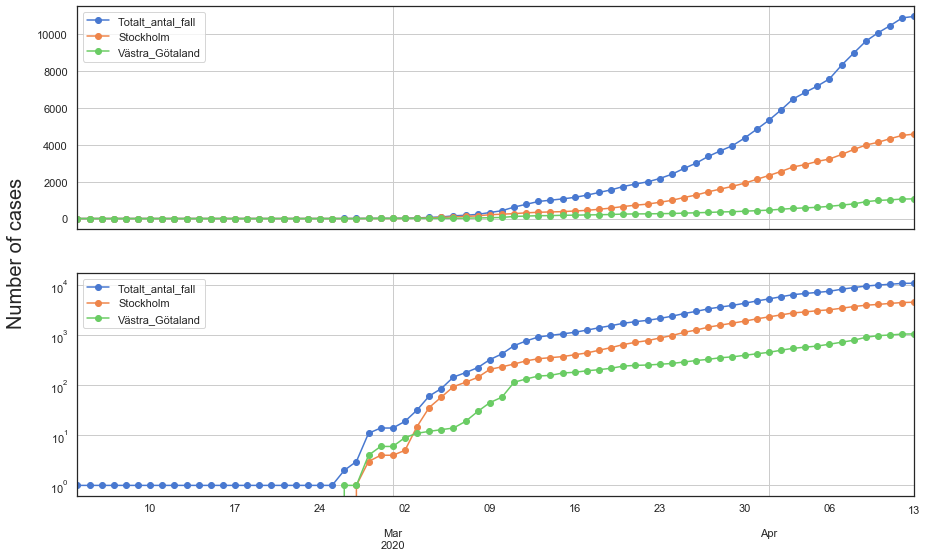

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,9))

dfi.cumsum().plot(y=['Totalt_antal_fall', 'Stockholm', 'Västra_Götaland'], style='-o', grid=True, logy=False, ax=ax1)
dfi.cumsum().plot(y=['Totalt_antal_fall', 'Stockholm', 'Västra_Götaland'], style='-o', grid=True, logy=True, ax=ax2)

ax2.set_xlabel('')
fig.text(0.06, 0.5, 'Number of cases', va='center', rotation='vertical', fontsize=20)

<a id='sjukdomsutfall'></a>
## Sjukdomsutfall vs ålder

[Tillbaka till början](#top)

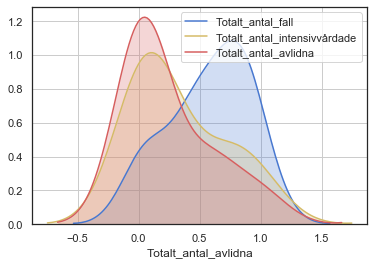

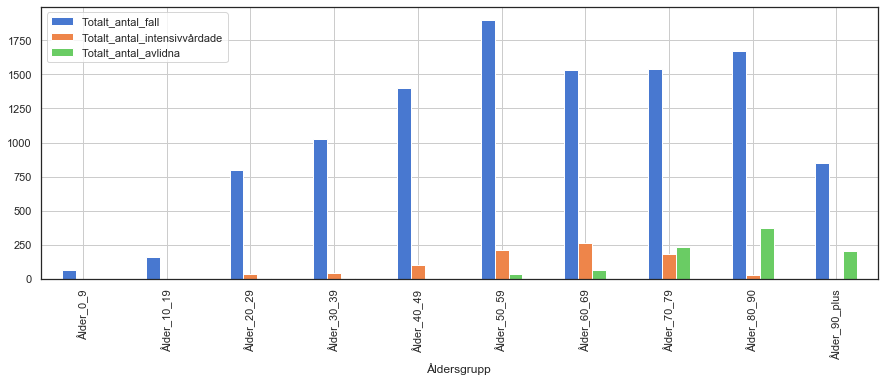

In [8]:
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)

df_age = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx", sheet_name=5)
df_age = df_age.iloc[:-1]
df_age.set_index('Åldersgrupp', inplace=True)

sns.distplot(df_age['Totalt_antal_fall']/df_age['Totalt_antal_fall'].max(), hist=False, color="b", kde_kws={"shade": True}, label='Totalt_antal_fall')
sns.distplot(df_age['Totalt_antal_intensivvårdade']/df_age['Totalt_antal_intensivvårdade'].max(), hist=False, color="y", kde_kws={"shade": True}, label='Totalt_antal_intensivvårdade')
sns.distplot(df_age['Totalt_antal_avlidna']/df_age['Totalt_antal_avlidna'].max(), hist=False, color="r", kde_kws={"shade": True}, label='Totalt_antal_avlidna')
plt.grid()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

p = df_age.plot(kind='bar', grid=True, ax=ax)

<a id='derivative'></a>
## Förändring av sjukdomsfall över tid

[Tillbaka till början](#top)

Text(0.5, 1.0, 'Derivative of cumulative number per region')

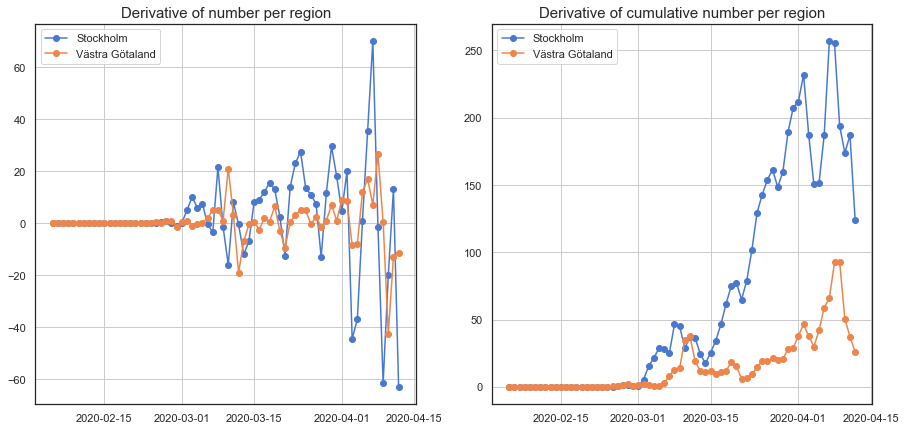

In [9]:
# Derivative of the

def derivative(array):
    d = []
    for i in range(1,len(array)-1):
        d.append((array[i+1] - array[i-1])/2)
    return d

t = df.iloc[1:-1].Statistikdatum

# Antal fall per region
d1 = derivative(dfi.Stockholm.to_list())
d2 = derivative(dfi.Västra_Götaland.to_list())

# Cumulative antal fall per region
c1 = derivative(dfi.cumsum().Stockholm.to_list())
c2 = derivative(dfi.cumsum().Västra_Götaland.to_list())

fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(t, d1, '-o', label='Stockholm')
ax1.plot(t, d2, '-o', label='Västra Götaland')
ax1.legend()
ax1.grid()
ax1.set_title('Derivative of number per region', fontsize=15)

ax2.plot(t, c1, '-o', label='Stockholm')
ax2.plot(t, c2, '-o', label='Västra Götaland')
ax2.legend()
ax2.grid()
ax2.set_title('Derivative of cumulative number per region', fontsize=15)

<a id='trajectory'></a>
## Pandemiutveckling

Denna beräkningen är tagen från youtubekanalen [minutephysics](https://www.youtube.com/watch?v=54XLXg4fYsc)

[Tillbaka till början](#top)

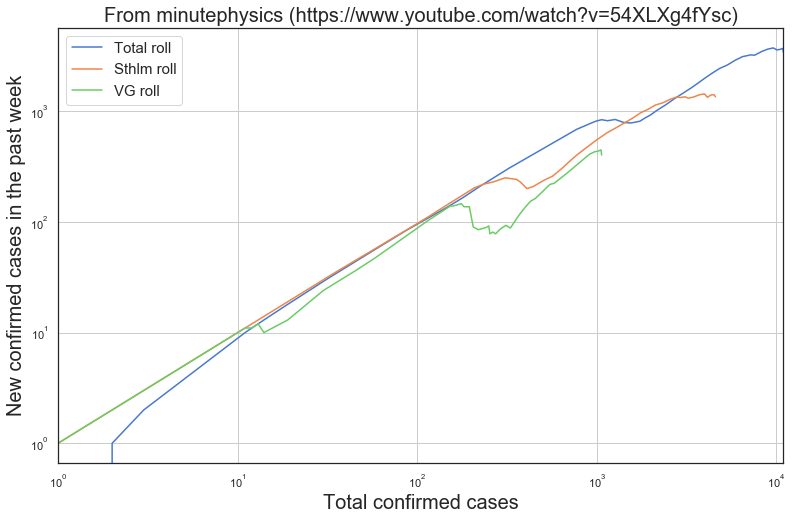

In [10]:
minutephysics = "https://www.youtube.com/watch?v=54XLXg4fYsc"
cols = ['Totalt_antal_fall', 'Stockholm', 'Västra_Götaland']
df_mp = df[cols]
df_mp.loc[:,'sthlm_roll'] = df_mp['Stockholm'].rolling(7).sum()
df_tmp = df_mp[cols].rolling(7).sum()
df_tmp.columns = ['Total roll', 'Sthlm roll', 'VG roll']
df_roll = pd.concat([df_mp.cumsum(), df_tmp], axis=1, sort=False)

fig, ax = plt.subplots(figsize=(13,8))
df_roll.plot(x='Totalt_antal_fall', y='Total roll', grid=True, loglog=True, ax=ax)
df_roll.plot(x='Stockholm', y='Sthlm roll', grid=True, loglog=True, ax=ax)
df_roll.plot(x='Västra_Götaland', y='VG roll', grid=True, loglog=True, ax=ax)

ax.set_ylabel('New confirmed cases in the past week', fontsize=20)
ax.set_xlabel('Total confirmed cases', fontsize=20)
ax.set_title(f"From minutephysics ({minutephysics})", fontsize=20)
ax.legend(fontsize=15)
